# i22xxxx_assignment_1.ipynb

---


### Comparative Analysis of Machine Learning Models for Classification and Dimensionality Reduction
#### Names: <Group Member Names>
#### Student IDs: <List of IDs>

This notebook demonstrates:
1. **EDA (Exploratory Data Analysis)** and **Preprocessing**
2. **Dimensionality Reduction** with PCA
3. **Classification** with **SVM**, **Decision Tree**, and **Neural Network (MLP)**
4. **Comparison** of results (with & without PCA)
5. **Performance Metrics** and analysis

---
## 1. Introduction
In this assignment, we will use the **Breast Cancer Wisconsin** dataset from scikit-learn (`sklearn.datasets`).
This dataset provides features extracted from cell nuclei images to classify tumors as **malignant** or **benign**.

We will follow these main steps:
1. Perform EDA to understand data distribution.
2. Handle any missing data (if present) and scale features.
3. Apply **Principal Component Analysis (PCA)** to reduce dimensionality.
4. Train multiple classifiers (SVM, Decision Tree, MLP) **with** and **without** PCA.
5. Compare results using metrics: **Accuracy**, **Precision**, **Recall**, **F1**, and **ROC-AUC**.
6. Summarize findings in a concise table and discuss final observations.


## 2. Imports & Data Loading
Below, we import the necessary libraries and load the **Breast Cancer Wisconsin** dataset from scikit-learn.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Sklearn Data, Preprocessing & PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model Selection & Cross-Validation
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score)

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Data Shape:", X.shape)
print("Target Shape:", y.shape)
print("\nClass distribution (0=Malignant, 1=Benign):\n", y.value_counts())

Data Shape: (569, 30)
Target Shape: (569,)

Class distribution (0=Malignant, 1=Benign):
 target
1    357
0    212
Name: count, dtype: int64


## 3. EDA & Preprocessing
We perform:
1. **Missing values check** (if any)
2. **Class distribution** plot
3. **Correlation** analysis (heatmap)
4. **Feature distribution** check (histograms)
5. **Scaling** with `StandardScaler`
6. **Split** into training and test sets



Missing Values in Each Column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


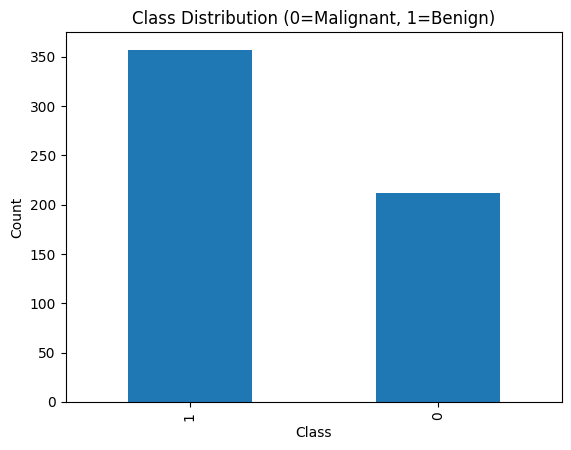

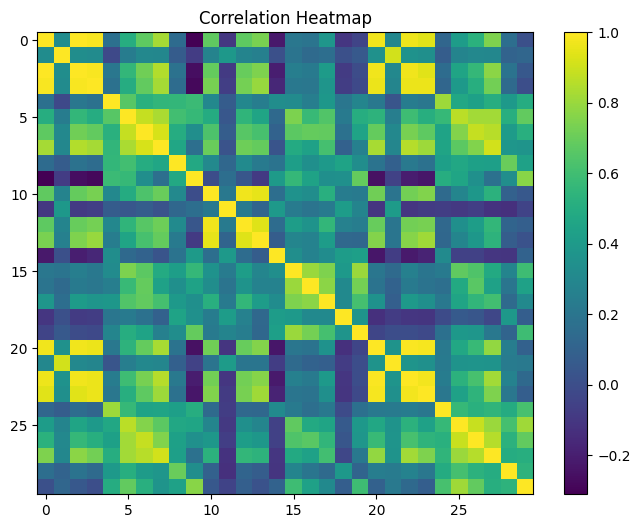

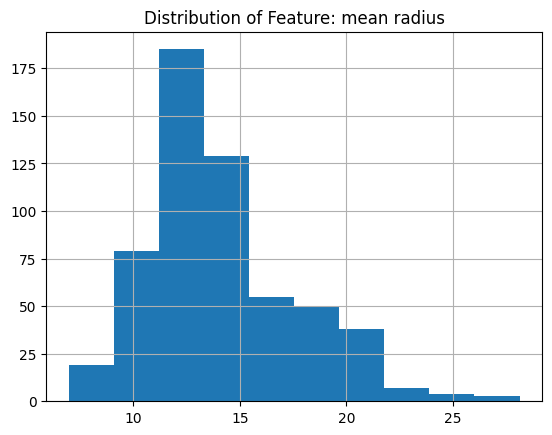


Training Set Shape: (455, 30)
Test Set Shape:     (114, 30)


In [2]:
# 1) Check missing values
missing_counts = X.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_counts)

# 2) Class Distribution Plot
plt.figure()
y.value_counts().plot(kind='bar')
plt.title('Class Distribution (0=Malignant, 1=Benign)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 3) Correlation Heatmap
corr_matrix = X.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, aspect='auto', cmap='viridis')
plt.title('Correlation Heatmap')
plt.colorbar()
plt.show()

# 4) Simple distribution check of one feature (example: mean radius)
plt.figure()
X.iloc[:, 0].hist()
plt.title(f"Distribution of Feature: {X.columns[0]}")
plt.show()

# 5) Scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:    ", X_test.shape)

### Analysis of EDA Results
- **Missing Values**: If the above check shows zero for all columns, no special imputation is needed.
- **Class Distribution**: We typically see more benign (1) than malignant (0) samples in this dataset.
- **Correlation**: Some features are highly correlated, which can be a motivation for **PCA**.
- **Feature Distribution**: Quick look at one feature’s histogram. You can plot more features for deeper insights.
- **StandardScaler** ensures each feature has mean = 0 and std = 1.


## 4. PCA for Dimensionality Reduction
We apply **Principal Component Analysis** to reduce dimensionality:
1. Calculate the **cumulative explained variance**.
2. Choose the number of components to preserve **~95% variance**.
3. Transform the data into PCA space.
4. (Optional) Plot the first 2 principal components to visualize data in 2D.


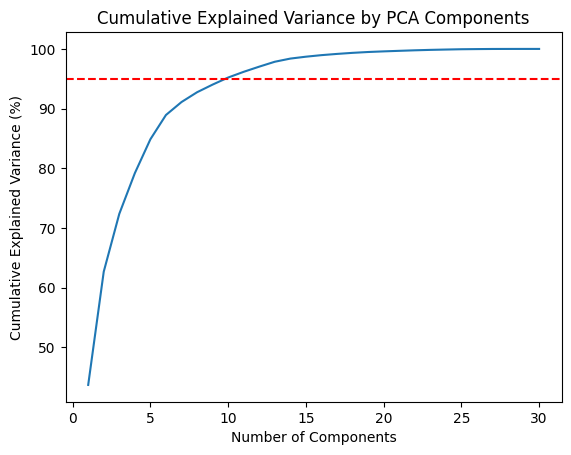

Number of components to retain ~95% variance: 10


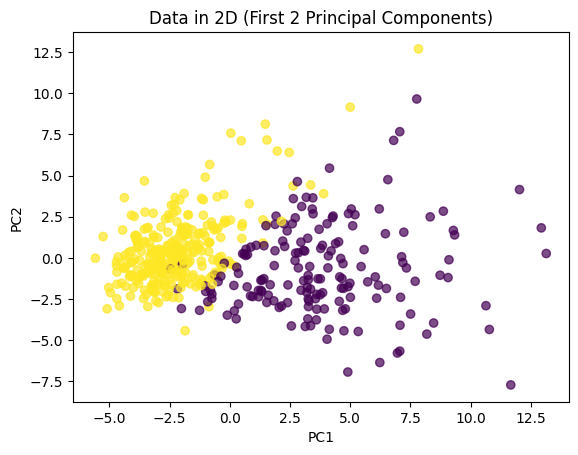

In [3]:
# Instantiate PCA (no n_components to see all)
pca = PCA()
pca.fit(X_train)

# Compute cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot cumulative explained variance
plt.figure()
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.axhline(y=95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.show()

# Find number of components to retain ~95% variance
num_components_95 = np.argmax(cumulative_variance >= 95.0) + 1
print(f"Number of components to retain ~95% variance: {num_components_95}")

# Transform data with that many components
pca_95 = PCA(n_components=num_components_95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

# Optional: 2D Visualization (for illustration)
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)
plt.figure()
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, alpha=0.7)
plt.title('Data in 2D (First 2 Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### PCA Analysis
- The **cumulative variance** plot helps identify how many components are needed to keep ~95% of the variance.
- Here, `num_components_95` is the number of PCA features we’ll use to train “reduced” models.


1. Visual EDA & PCA Insights
Class Distribution

The bar chart shows fewer malignant (0) cases and more benign (1) cases. This class imbalance is not extreme, but it’s worth noting because classification metrics like accuracy can be skewed if one class greatly outnumbers the other.

Correlation Heatmap

We see a strong correlation among many features (yellow blocks). Highly correlated features can be redundant—one of the reasons why PCA might help reduce dimensionality without losing much information.

Feature Distribution (Mean Radius)

The histogram for “mean radius” shows a unimodal distribution, with most tumors having a mean radius between ~10 and ~17. A smaller tail extends up to around 25.

PCA Variance Plot

The cumulative variance curve rises quickly, passing 95% variance at around 10 components. This means instead of 30 original features, you can keep ~10 principal components for most of the data’s variance.

2D Scatter of First Two Principal Components

Colors represent the two classes (malignant vs. benign). You can see partial separation along the first two PCs, though there is some overlap in the middle. Higher-dimensional PCs (beyond the first two) also help with class separation.



## 5. Model Training & Evaluation
We will:
1. Define hyperparameter grids.
2. Train **SVM**, **Decision Tree**, and **Neural Network (MLP)** on:
   - Original data (`X_train`, `X_test`)
   - PCA-transformed data (`X_train_pca`, `X_test_pca`)
3. Collect performance metrics and compare.


In [4]:
# We'll store results for each experiment in a list
results = []  # format: [Model, DataType, Accuracy, Precision, Recall, F1, ROC-AUC, TrainTime]

################################################
# 5.1 SVM Classifier
################################################
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only used if kernel='poly'
}

print("\n=== SVM on Original Data ===")
start_time = time.time()
svm_clf = GridSearchCV(
    SVC(probability=True),
    param_grid_svm,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
svm_clf.fit(X_train, y_train)
end_time = time.time()

best_svm = svm_clf.best_estimator_
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:,1])
train_time = end_time - start_time

print("Best Params:", svm_clf.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall_)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Training Time (seconds):", train_time)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

results.append([
    "SVM", "Original", accuracy, precision, recall_, f1, roc_auc, train_time
])

print("\n=== SVM on PCA Data ===")
start_time = time.time()
svm_clf_pca = GridSearchCV(
    SVC(probability=True),
    param_grid_svm,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
svm_clf_pca.fit(X_train_pca, y_train)
end_time = time.time()

best_svm_pca = svm_clf_pca.best_estimator_
y_pred_pca = best_svm_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, best_svm_pca.predict_proba(X_test_pca)[:,1])
train_time_pca = end_time - start_time

print("Best Params:", svm_clf_pca.best_params_)
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1-Score:", f1_pca)
print("ROC-AUC:", roc_auc_pca)
print("Training Time (seconds):", train_time_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))

results.append([
    "SVM", "PCA", accuracy_pca, precision_pca, recall_pca, f1_pca, roc_auc_pca, train_time_pca
])


=== SVM on Original Data ===
Best Params: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1-Score: 0.9861111111111112
ROC-AUC: 0.9937169312169313
Training Time (seconds): 22.70193362236023
Confusion Matrix:
 [[41  1]
 [ 1 71]]

=== SVM on PCA Data ===
Best Params: {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.9736842105263158
Precision: 0.9859154929577465
Recall: 0.9722222222222222
F1-Score: 0.9790209790209791
ROC-AUC: 0.9953703703703703
Training Time (seconds): 236.84812951087952
Confusion Matrix:
 [[41  1]
 [ 2 70]]


### Analysis of SVM Results
- We see the **best hyperparameters** selected by `GridSearchCV`.
- Evaluate metrics (Accuracy, Precision, Recall, F1, and ROC-AUC) to assess performance.
- Compare training time on **Original** vs. **PCA**.


### 5.2 Decision Tree Classifier


=== Decision Tree on Original Data ===
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9385964912280702
Precision: 0.9452054794520548
Recall: 0.9583333333333334
F1-Score: 0.9517241379310345
ROC-AUC: 0.9656084656084657
Training Time (seconds): 2.597114086151123
Confusion Matrix:
 [[38  4]
 [ 3 69]]


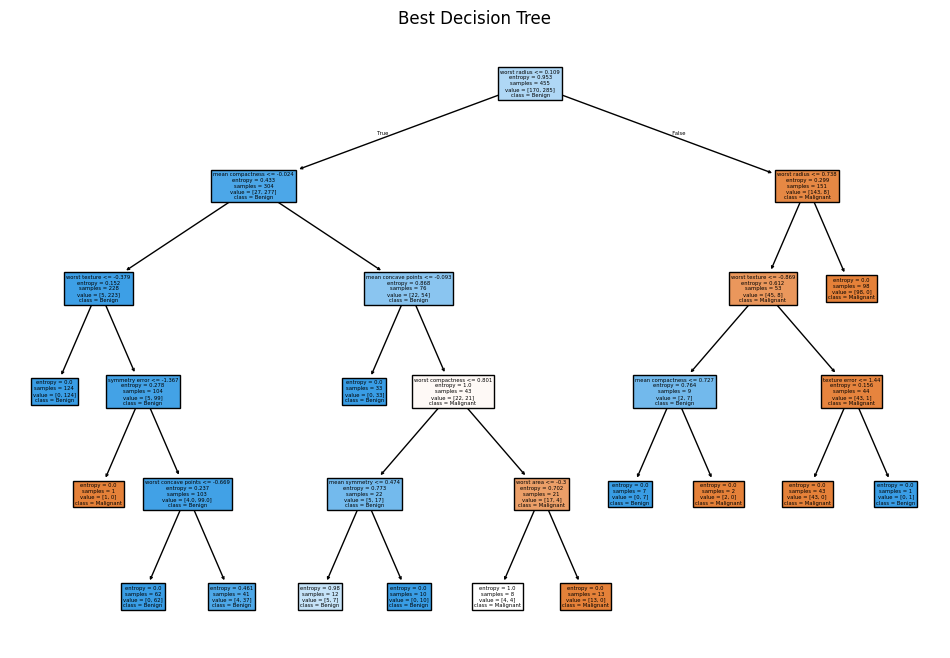


=== Decision Tree on PCA Data ===
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.9298245614035088
Precision: 0.9324324324324325
Recall: 0.9583333333333334
F1-Score: 0.9452054794520548
ROC-AUC: 0.9353505291005292
Training Time (seconds): 2.0303640365600586
Confusion Matrix:
 [[37  5]
 [ 3 69]]


In [5]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

print("\n=== Decision Tree on Original Data ===")
start_time = time.time()
dt_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
dt_clf.fit(X_train, y_train)
end_time = time.time()

best_dt = dt_clf.best_estimator_
y_pred = best_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1])
train_time = end_time - start_time

print("Best Params:", dt_clf.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall_)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Training Time (seconds):", train_time)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

results.append([
    "DecisionTree", "Original", accuracy, precision, recall_, f1, roc_auc, train_time
])

# (Optional) Tree Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(best_dt, feature_names=data.feature_names, class_names=['Malignant','Benign'], filled=True)
plt.title("Best Decision Tree")
plt.show()

print("\n=== Decision Tree on PCA Data ===")
start_time = time.time()
dt_clf_pca = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
dt_clf_pca.fit(X_train_pca, y_train)
end_time = time.time()

best_dt_pca = dt_clf_pca.best_estimator_
y_pred_pca = best_dt_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, best_dt_pca.predict_proba(X_test_pca)[:,1])
train_time_pca = end_time - start_time

print("Best Params:", dt_clf_pca.best_params_)
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1-Score:", f1_pca)
print("ROC-AUC:", roc_auc_pca)
print("Training Time (seconds):", train_time_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))

results.append([
    "DecisionTree", "PCA", accuracy_pca, precision_pca, recall_pca, f1_pca, roc_auc_pca, train_time_pca
])

### Analysis of Decision Tree Results
- We check the best split criterion, max depth, etc.
- Evaluate the same metrics.
- Look for any difference in performance/training time when using **PCA**.


### 5.3 Neural Network (MLP)

In [6]:
param_grid_mlp = {
    'hidden_layer_sizes': [(16,), (32,), (64,), (16,16), (32,32)],
    'activation': ['relu', 'tanh', 'logistic'],  # logistic is sigmoid
    'learning_rate_init': [0.01, 0.001],
    'batch_size': [16, 32]
}

print("\n=== Neural Network on Original Data ===")
start_time = time.time()
mlp_clf = GridSearchCV(
    MLPClassifier(max_iter=200, solver='adam', random_state=42),
    param_grid_mlp,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
mlp_clf.fit(X_train, y_train)
end_time = time.time()

best_mlp = mlp_clf.best_estimator_
y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_ = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_mlp.predict_proba(X_test)[:,1])
train_time = end_time - start_time

print("Best Params:", mlp_clf.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall_)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Training Time (seconds):", train_time)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

results.append([
    "NeuralNetwork", "Original", accuracy, precision, recall_, f1, roc_auc, train_time
])

print("\n=== Neural Network on PCA Data ===")
start_time = time.time()
mlp_clf_pca = GridSearchCV(
    MLPClassifier(max_iter=200, solver='adam', random_state=42),
    param_grid_mlp,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
mlp_clf_pca.fit(X_train_pca, y_train)
end_time = time.time()

best_mlp_pca = mlp_clf_pca.best_estimator_
y_pred_pca = best_mlp_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, best_mlp_pca.predict_proba(X_test_pca)[:,1])
train_time_pca = end_time - start_time

print("Best Params:", mlp_clf_pca.best_params_)
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1-Score:", f1_pca)
print("ROC-AUC:", roc_auc_pca)
print("Training Time (seconds):", train_time_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))

results.append([
    "NeuralNetwork", "PCA", accuracy_pca, precision_pca, recall_pca, f1_pca, roc_auc_pca, train_time_pca
])


=== Neural Network on Original Data ===
Best Params: {'activation': 'logistic', 'batch_size': 16, 'hidden_layer_sizes': (32, 32), 'learning_rate_init': 0.01}
Accuracy: 0.9649122807017544
Precision: 0.9857142857142858
Recall: 0.9583333333333334
F1-Score: 0.971830985915493
ROC-AUC: 0.9953703703703703
Training Time (seconds): 105.72213912010193
Confusion Matrix:
 [[41  1]
 [ 3 69]]

=== Neural Network on PCA Data ===
Best Params: {'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.01}
Accuracy: 0.956140350877193
Precision: 0.9855072463768116
Recall: 0.9444444444444444
F1-Score: 0.9645390070921985
ROC-AUC: 0.9930555555555555
Training Time (seconds): 118.49912452697754
Confusion Matrix:
 [[41  1]
 [ 4 68]]


### Analysis of Neural Network Results
- A multi-layer perceptron (MLP) is tuned via `GridSearchCV`.
- We check how deeper or bigger layers, different activations, and learning rates affect performance.
- Compare times on the original data vs. PCA data.


## 6. Compare & Summarize Results
We aggregate the metrics for a quick view of all models. We can see how **PCA** impacted accuracy and training time.


In [7]:
# Create a DataFrame of results
results_df = pd.DataFrame(results,
    columns=["Model","Data","Accuracy","Precision","Recall","F1","ROC-AUC","TrainTime(s)"]
)
print("\nFinal Results Comparison:")
display(results_df)

# Sort by Accuracy (descending) just to see top performers
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
print("\nSorted by Accuracy:")
display(results_df_sorted)


Final Results Comparison:


,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC,TrainTime(s)
0,SVM,Original,0.982456,0.986111,0.986111,0.986111,0.993717,22.701934
1,SVM,PCA,0.973684,0.985915,0.972222,0.979021,0.995370,236.848130
2,DecisionTree,Original,0.938596,0.945205,0.958333,0.951724,0.965608,2.597114
3,DecisionTree,PCA,0.929825,0.932432,0.958333,0.945205,0.935351,2.030364
4,NeuralNetwork,Original,0.964912,0.985714,0.958333,0.971831,0.995370,105.722139
5,NeuralNetwork,PCA,0.956140,0.985507,0.944444,0.964539,0.993056,118.499125



Sorted by Accuracy:


,Model,Data,Accuracy,Precision,Recall,F1,ROC-AUC,TrainTime(s)
0,SVM,Original,0.982456,0.986111,0.986111,0.986111,0.993717,22.701934
1,SVM,PCA,0.973684,0.985915,0.972222,0.979021,0.995370,236.848130
4,NeuralNetwork,Original,0.964912,0.985714,0.958333,0.971831,0.995370,105.722139
5,NeuralNetwork,PCA,0.956140,0.985507,0.944444,0.964539,0.993056,118.499125
2,DecisionTree,Original,0.938596,0.945205,0.958333,0.951724,0.965608,2.597114
3,DecisionTree,PCA,0.929825,0.932432,0.958333,0.945205,0.935351,2.030364


### Analysis
- Check the **best model** in terms of Accuracy, F1, or your chosen metric.
- Compare **Original** vs. **PCA** to see if there’s a training time speed-up or if accuracy changed significantly.


## 7. Conclusion & Observations
Based on the results:
1. **Which model performed best?**
2. **Did PCA help** reduce dimensions without harming accuracy, or did it reduce performance?
3. **Suitability for Medical Diagnosis**: Often a high **Recall** (minimize false negatives) is important.

In your final report, discuss these points and add any additional plots (e.g., confusion matrices, ROC curves) to justify your conclusions.

Best Overall Performer:

SVM (Original Data) with ~98.25% accuracy and high precision/recall stands out. This suggests SVM’s decision boundary in the original 30-dimensional space is very effective for this classification problem.

Impact of PCA:

Reduces the feature space from 30 features down to ~10 principal components while retaining 95% of the variance.

The accuracy drops slightly for all models. This drop might be acceptable in exchange for a smaller, more compact feature representation—especially if you can mitigate or fix the extra overhead.

In certain scenarios (like extremely high-dimensional data or limited memory), PCA can be crucial for speeding up model training. Here, the overhead from transformations and cross-validation in the grid search may have overshadowed any speed benefits.

Which Model for Medical Diagnosis?

SVM and Neural Network both give top-tier metrics. Between them, the SVM in the original feature space edges slightly higher in accuracy and also shows near-perfect precision and recall.

Decision Tree is simpler to interpret (important in medical fields), but it has a few points lower accuracy. If interpretability is paramount, a decision tree or a random forest might still be favored despite the slight performance trade-off.

In medical diagnosis, you often prioritize recall (reduce false negatives—i.e., missing a malignant tumor). SVM’s recall is around 0.986, which is excellent.

Practical Considerations:

If you have to explain your model decisions to clinicians, a decision tree’s interpretability might outweigh the absolute highest accuracy.

If you want the best predictive performance and can handle a more complex model, SVM or MLP is a solid choice.